In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt 
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras import  layers
import keras
from sklearn import datasets
import matplotlib.pyplot as plt

In [2]:
#load data
#4000 米 的
path = 'D:\ML_data_sql\\2022数模美赛选拔赛\\all'
data5 = pd.read_excel(os.path.join(path,'all14.xlsx'),engine='openpyxl')
df2= data5.drop(data5.columns[[9,10,11,12,14,15,16,17,18,19,20,21,22,23,24,-2,-1]], axis=1)
df2 = df2.fillna(method='pad',axis=1)
# print(np.any(df2.isnull())) 
df2_index = pd.period_range('2005-01',periods=df2.shape[0],freq='M')
df2 = df2.drop(df2.columns[[0,4,5]],axis=1)
df2.index = df2_index
# #数据处理结束
df2.head()

,海拔高度(m),经度,纬度,平均气温(℃),平均最高气温(℃),平均最低气温(℃),平均气温≤0℃的天数,平均风速(knots),平均最大持续风速(knots),单日最大平均风速(knots)
2005-01,4084.0,77.37,-80.37,1.00,1.00,1.00,0.0,0.00,0.00,0.0
2005-02,4084.0,77.37,-80.37,-49.78,-43.79,-56.76,7.0,4.59,6.61,13.0
2005-03,4084.0,77.37,-80.37,-54.38,-48.70,-60.88,31.0,3.32,5.99,33.0
2005-04,4084.0,77.37,-80.37,-63.41,-58.31,-67.96,30.0,3.36,4.91,13.0
2005-05,4084.0,77.37,-80.37,-62.32,-57.69,-66.11,31.0,3.52,4.62,7.0


In [3]:
#归一化处理
from sklearn.preprocessing import MinMaxScaler

vis = df2['平均气温(℃)'].values

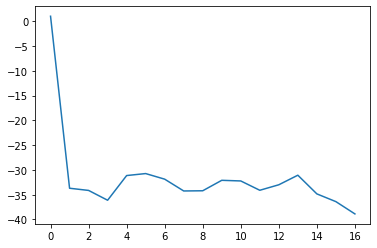

[1.0,
 -33.7,
 -34.14,
 -36.12,
 -31.14,
 -30.74,
 -31.87,
 -34.25,
 -34.21,
 -32.1,
 -32.23,
 -34.11,
 -33.0,
 -31.07,
 -34.84,
 -36.4,
 -38.88]

In [4]:
one =[]
for i in range(0,len(vis),12):
    one.append(vis[i])
plt.plot(one)
plt.show()
one

In [5]:
vis = vis.reshape(-1,1)
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(vis)
# print(scaled_data)
scaled_data_series = scaled_data.reshape(-1,1)
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix][-1]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [6]:
scaled_data_series.shape

(203, 1)

In [7]:
raw_seq = scaled_data_series

# choose a number of time steps
#设置步长
n_steps = 12

# split into samples
X, y = split_sequence(raw_seq, n_steps)


In [8]:
print(X.shape,y.shape)

(191, 12, 1) (191,)


In [9]:

train_data = X[:-24]
test_data = X[-24:]

train_y = y[:-24]
test_y = y[-24:]

y1 = np.arange(1,train_data.shape[0]+1) 
y2 = np.arange(train_data.shape[0],train_data.shape[0]+test_data.shape[0])

# plt.plot(y1, train_data, 'r', y2, test_data, 'b')
# plt.show()

In [10]:
train_data.shape

(167, 12, 1)

Epoch 1/100
84/84 - 0s - loss: 0.0356
Epoch 2/100
84/84 - 0s - loss: 0.0276
Epoch 3/100
84/84 - 0s - loss: 0.0217
Epoch 4/100
84/84 - 0s - loss: 0.0066
Epoch 5/100
84/84 - 0s - loss: 0.0050
Epoch 6/100
84/84 - 0s - loss: 0.0086
Epoch 7/100
84/84 - 0s - loss: 0.0034
Epoch 8/100
84/84 - 0s - loss: 0.0029
Epoch 9/100
84/84 - 0s - loss: 0.0028
Epoch 10/100
84/84 - 0s - loss: 0.0030
Epoch 11/100
84/84 - 0s - loss: 0.0026
Epoch 12/100
84/84 - 0s - loss: 0.0032
Epoch 13/100
84/84 - 0s - loss: 0.0024
Epoch 14/100
84/84 - 0s - loss: 0.0030
Epoch 15/100
84/84 - 0s - loss: 0.0026
Epoch 16/100
84/84 - 0s - loss: 0.0029
Epoch 17/100
84/84 - 0s - loss: 0.0025
Epoch 18/100
84/84 - 0s - loss: 0.0023
Epoch 19/100
84/84 - 0s - loss: 0.0023
Epoch 20/100
84/84 - 0s - loss: 0.0029
Epoch 21/100
84/84 - 0s - loss: 0.0029
Epoch 22/100
84/84 - 0s - loss: 0.0022
Epoch 23/100
84/84 - 0s - loss: 0.0027
Epoch 24/100
84/84 - 0s - loss: 0.0023
Epoch 25/100
84/84 - 0s - loss: 0.0026
Epoch 26/100
84/84 - 0s - loss: 0.

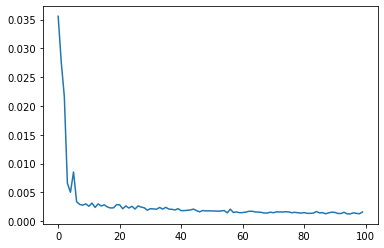

In [11]:
n_features = 1
train_data = train_data.reshape(train_data.shape[0], train_data.shape[1], n_features)
test_data = test_data.reshape(test_data.shape[0], test_data.shape[1], n_features)
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

history = model.fit(train_data, train_y, epochs=100, batch_size=2, verbose=2)
plt.plot(history.history['loss'])
plt.savefig('loss')
plt.show()

In [12]:
predictions = model.predict(test_data, verbose=2)
train_pre = model.predict(train_data,verbose=2)
predictions = predictions.reshape(predictions.shape[0])
print(predictions.shape, test_y.shape)

1/1 - 0s
6/6 - 0s
(24,) (24,)


In [13]:
show_data = np.hstack((train_y,test_y))
print(len(show_data))
print(train_pre.shape,predictions.shape)
train_pre = train_pre.squeeze()
pre_data = np.hstack((train_pre,predictions))
print(pre_data.shape)

191
(167, 1) (24,)
(191,)


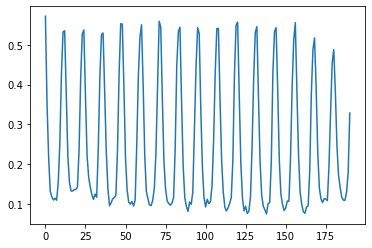

In [14]:
plt.plot(pre_data)
plt.show()

In [15]:
pre_18 = pre_data
pre_18.shape,predictions.shape

((191,), (24,))

In [16]:
# predict = np.hstack((pre_18, predictions))
# predict.shape
predict = pre_18.reshape(-1,1)
pre_train,_ =split_sequence(predict,12)
pre_2022 = model.predict(pre_train,verbose=2)

6/6 - 0s


In [17]:
pre_2022 = pre_2022.reshape(-1,1)
pre_train,_ =split_sequence(pre_2022,12)
pre_2023 = model.predict(pre_train,verbose=2)

6/6 - 0s


In [18]:
pre_2023 = pre_2023.reshape(-1,1)
pre_train,_ =split_sequence(pre_2023,12)
pre_2024 = model.predict(pre_train,verbose=2)

5/5 - 0s


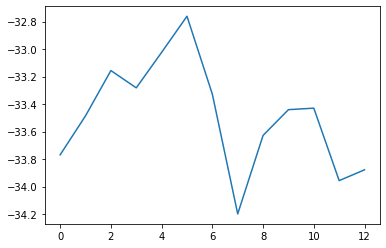

[array([-33.76921], dtype=float32),
 array([-33.485714], dtype=float32),
 array([-33.156513], dtype=float32),
 array([-33.28227], dtype=float32),
 array([-33.024086], dtype=float32),
 array([-32.761444], dtype=float32),
 array([-33.3284], dtype=float32),
 array([-34.199146], dtype=float32),
 array([-33.62806], dtype=float32),
 array([-33.440838], dtype=float32),
 array([-33.42991], dtype=float32),
 array([-33.9569], dtype=float32),
 array([-33.878414], dtype=float32)]

In [19]:
pre_2024_real = scaler.inverse_transform(pre_2024)
# print(pre_2022_real)
# plt.plot(pre_2022_real)
# plt.show()
aaa = []
for i in range(0,len(pre_2024_real),12):
    aaa.append(pre_2024_real[i])

plt.plot(aaa)
plt.show()
aaa

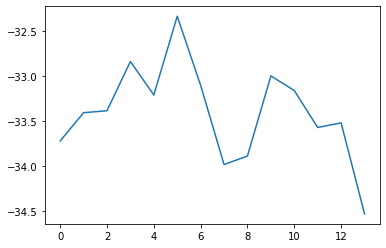

[array([-33.717476], dtype=float32),
 array([-33.404087], dtype=float32),
 array([-33.38197], dtype=float32),
 array([-32.83616], dtype=float32),
 array([-33.20749], dtype=float32),
 array([-32.333935], dtype=float32),
 array([-33.100864], dtype=float32),
 array([-33.97904], dtype=float32),
 array([-33.88431], dtype=float32),
 array([-32.99556], dtype=float32),
 array([-33.15805], dtype=float32),
 array([-33.5679], dtype=float32),
 array([-33.51706], dtype=float32),
 array([-34.52682], dtype=float32)]

In [20]:
pre_2023_real = scaler.inverse_transform(pre_2023)
# print(pre_2022_real)
# plt.plot(pre_2022_real)
# plt.show()
aaa = []
for i in range(0,len(pre_2023_real),12):
    aaa.append(pre_2023_real[i])

plt.plot(aaa)
plt.show()
aaa

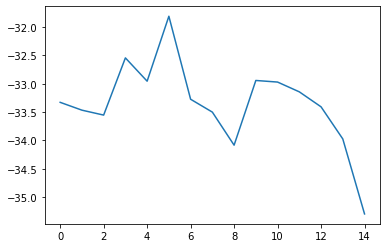

[array([-33.32838], dtype=float32),
 array([-33.46611], dtype=float32),
 array([-33.552982], dtype=float32),
 array([-32.54579], dtype=float32),
 array([-32.956078], dtype=float32),
 array([-31.8125], dtype=float32),
 array([-33.273865], dtype=float32),
 array([-33.500652], dtype=float32),
 array([-34.082436], dtype=float32),
 array([-32.943356], dtype=float32),
 array([-32.971462], dtype=float32),
 array([-33.143654], dtype=float32),
 array([-33.40753], dtype=float32),
 array([-33.97302], dtype=float32),
 array([-35.293068], dtype=float32)]

In [38]:
pre_2022_real = scaler.inverse_transform(pre_2022)
# print(pre_2022_real)
# plt.plot(pre_2022_real)
# plt.show()
aaa = []
for i in range(0,len(pre_2022_real),12):
    aaa.append(pre_2022_real[i])

plt.plot(aaa)
plt.savefig('all14_22-37.png')
plt.show()
aaa

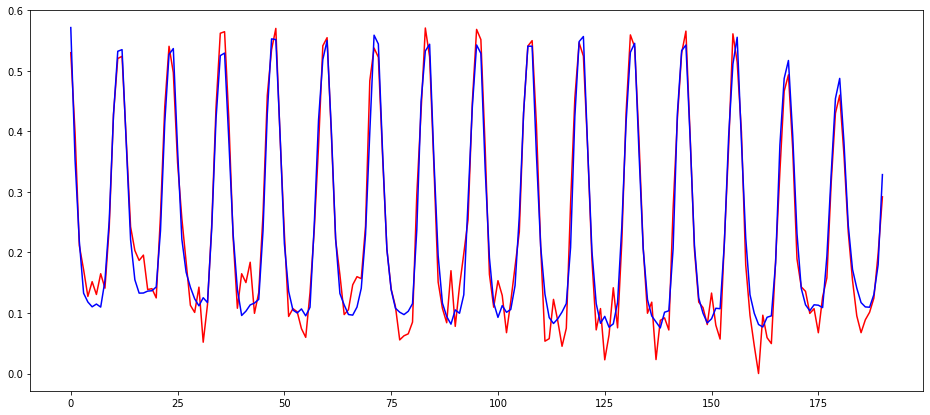

In [24]:
fig = plt.figure(figsize=(16, 7))
plt.plot(range(len(show_data)), show_data,'r',range(len(show_data)),pre_data,'b')
# plt.savefig('all1.png')
plt.show()

In [25]:
regressor = Sequential()
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (train_data.shape[1], 1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = 1))
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [26]:
history2 = regressor.fit(train_data, train_y, epochs=100, batch_size=2, verbose=2)

Epoch 1/100
84/84 - 1s - loss: 0.0361
Epoch 2/100
84/84 - 1s - loss: 0.0230
Epoch 3/100
84/84 - 1s - loss: 0.0119
Epoch 4/100
84/84 - 1s - loss: 0.0074
Epoch 5/100
84/84 - 1s - loss: 0.0061
Epoch 6/100
84/84 - 1s - loss: 0.0062
Epoch 7/100
84/84 - 1s - loss: 0.0059
Epoch 8/100
84/84 - 1s - loss: 0.0058
Epoch 9/100
84/84 - 1s - loss: 0.0053
Epoch 10/100
84/84 - 1s - loss: 0.0056
Epoch 11/100
84/84 - 1s - loss: 0.0040
Epoch 12/100
84/84 - 1s - loss: 0.0051
Epoch 13/100
84/84 - 1s - loss: 0.0057
Epoch 14/100
84/84 - 1s - loss: 0.0043
Epoch 15/100
84/84 - 1s - loss: 0.0046
Epoch 16/100
84/84 - 1s - loss: 0.0048
Epoch 17/100
84/84 - 1s - loss: 0.0042
Epoch 18/100
84/84 - 1s - loss: 0.0049
Epoch 19/100
84/84 - 1s - loss: 0.0048
Epoch 20/100
84/84 - 1s - loss: 0.0039
Epoch 21/100
84/84 - 1s - loss: 0.0053
Epoch 22/100
84/84 - 1s - loss: 0.0037
Epoch 23/100
84/84 - 1s - loss: 0.0038
Epoch 24/100
84/84 - 1s - loss: 0.0045
Epoch 25/100
84/84 - 1s - loss: 0.0043
Epoch 26/100
84/84 - 1s - loss: 0.

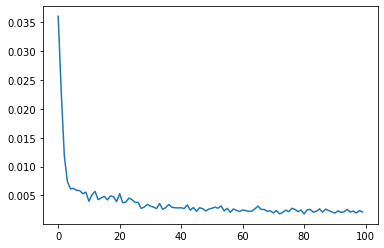

In [27]:
plt.plot(history2.history['loss'])
plt.savefig('loss_big.png')
plt.show()

In [28]:
predictions2 = regressor.predict(test_data, verbose=2)
train_pre2 = regressor.predict(train_data,verbose=2)
predictions2 = predictions2.reshape(predictions.shape[0])
train_pre2 = train_pre2.squeeze()
pre_data2 = np.hstack((train_pre2,predictions2))

1/1 - 0s
6/6 - 0s


In [34]:
predict2 = np.hstack((pre_18, predictions2))
# predict.shape
predict2 = predict2.reshape(-1,1)
pre_train2,_ =split_sequence(predict2,12)
pre_2022_2= regressor.predict(pre_train2,verbose=2)

7/7 - 0s


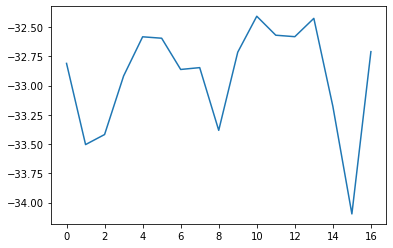

[array([-32.81003], dtype=float32),
 array([-33.50448], dtype=float32),
 array([-33.41851], dtype=float32),
 array([-32.917564], dtype=float32),
 array([-32.582527], dtype=float32),
 array([-32.594677], dtype=float32),
 array([-32.86196], dtype=float32),
 array([-32.846222], dtype=float32),
 array([-33.3827], dtype=float32),
 array([-32.7142], dtype=float32),
 array([-32.406693], dtype=float32),
 array([-32.569], dtype=float32),
 array([-32.58154], dtype=float32),
 array([-32.424683], dtype=float32),
 array([-33.17741], dtype=float32),
 array([-34.097614], dtype=float32),
 array([-32.709454], dtype=float32)]

In [39]:
pre_2022_2_r = scaler.inverse_transform(pre_2022_2)
# print(pre_2022_real)
# plt.plot(pre_2022_real)
# plt.show()
aaa = []
for i in range(0,len(pre_2022_2_r),12):
    aaa.append(pre_2022_2_r[i])

plt.plot(aaa)
plt.savefig('all14_22-37_2.png')
plt.show()
aaa

6/6 - 0s


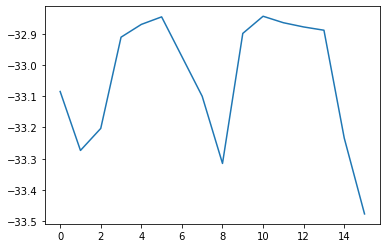

[array([-33.085037], dtype=float32),
 array([-33.273613], dtype=float32),
 array([-33.203148], dtype=float32),
 array([-32.91126], dtype=float32),
 array([-32.87035], dtype=float32),
 array([-32.846264], dtype=float32),
 array([-32.97328], dtype=float32),
 array([-33.10042], dtype=float32),
 array([-33.31519], dtype=float32),
 array([-32.899204], dtype=float32),
 array([-32.844254], dtype=float32),
 array([-32.864956], dtype=float32),
 array([-32.87851], dtype=float32),
 array([-32.888973], dtype=float32),
 array([-33.23398], dtype=float32),
 array([-33.47667], dtype=float32)]

In [36]:
pre_2023_2 = pre_2022_2.reshape(-1,1)
pre_train,_ =split_sequence(pre_2023_2,12)
pre_2023_2 = regressor.predict(pre_train,verbose=2)
pre_2023_real_2 = scaler.inverse_transform(pre_2023_2)
# print(pre_2022_real)
# plt.plot(pre_2022_real)
# plt.show()
aaa = []
for i in range(0,len(pre_2023_real_2),12):
    aaa.append(pre_2023_real_2[i])

plt.plot(aaa)
plt.show()
aaa

6/6 - 0s


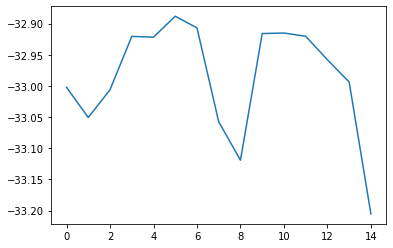

[array([-33.002407], dtype=float32),
 array([-33.05078], dtype=float32),
 array([-33.00622], dtype=float32),
 array([-32.92071], dtype=float32),
 array([-32.9219], dtype=float32),
 array([-32.888348], dtype=float32),
 array([-32.906986], dtype=float32),
 array([-33.0577], dtype=float32),
 array([-33.119232], dtype=float32),
 array([-32.916138], dtype=float32),
 array([-32.915268], dtype=float32),
 array([-32.92048], dtype=float32),
 array([-32.958183], dtype=float32),
 array([-32.993923], dtype=float32),
 array([-33.20542], dtype=float32)]

In [37]:
pre_2024_2 = pre_2023_2.reshape(-1,1)
pre_train,_ =split_sequence(pre_2024_2,12)
pre_2024_2 = regressor.predict(pre_train,verbose=2)
pre_2024_real_2 = scaler.inverse_transform(pre_2024_2)
# print(pre_2022_real)
# plt.plot(pre_2022_real)
# plt.show()
aaa = []
for i in range(0,len(pre_2024_real_2),12):
    aaa.append(pre_2024_real_2[i])

plt.plot(aaa)
plt.show()
aaa